<a href="https://colab.research.google.com/github/SumitBhatt061/PROJECTS/blob/main/Loan_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
data=pd.read_csv("/content/Loan Prediction Dataset.csv")

In [168]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Preprocessing

In [170]:
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [171]:
data["Gender"].value_counts()

,count
Gender,
Male,489
Female,112


In [172]:
data.Gender=data.Gender.fillna('Male')

In [173]:
data["Married"].value_counts()

,count
Married,
Yes,398
No,213


In [174]:
data.Married=data.Married.fillna('Yes')

In [175]:
data["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [176]:
data.Dependents=data.Dependents.fillna('0')

In [177]:
data["Self_Employed"].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [178]:
data.Self_Employed=data.Self_Employed.fillna('No')

In [179]:
data["LoanAmount"].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
187.0,12
160.0,12
...,...
292.0,1
142.0,1
350.0,1


In [180]:
data.LoanAmount=data.LoanAmount.fillna('120')

In [181]:
data["Loan_Amount_Term"].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [182]:
data.Loan_Amount_Term=data.Loan_Amount_Term.fillna('360')

In [183]:
data["Credit_History"].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [184]:
data.Credit_History=data.Credit_History.fillna('1.0')

In [185]:
data.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Spliting Data into training and testing

In [186]:
X=data.iloc[:,1:12].values
y=data.iloc[:,12]

In [187]:
import sklearn
from sklearn.model_selection import train_test_split

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [189]:
X_train

array([['Male', 'Yes', '3+', ..., 300.0, 0.0, 'Semiurban'],
       ['Female', 'No', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'No', '0', ..., 180.0, 0.0, 'Urban'],
       ...,
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

Encoding the non-integer values

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
labelencoder=LabelEncoder()

In [192]:
for i in range(0,5):
  X_train[:,i]=labelencoder.fit_transform(X_train[:,i])
  X_train[:,10]=labelencoder.fit_transform(X_train[:,10])
  X_test[:,i]=labelencoder.fit_transform(X_test[:,i])
  X_test[:,10]=labelencoder.fit_transform(X_test[:,10])

In [193]:
X_train

array([[1, 1, 3, ..., 300.0, 0.0, 1],
       [0, 0, 0, ..., 360.0, 1.0, 0],
       [1, 0, 0, ..., 180.0, 0.0, 2],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [194]:
labelencoder_y=LabelEncoder()

In [195]:
y_train=labelencoder_y.fit_transform(y_train)
y_test=labelencoder_y.fit_transform(y_test)

In [196]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0])

Scalling the values

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
sc=StandardScaler()

In [199]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [200]:
X_train

array([[ 0.46919134,  0.72038215,  2.17558327, ..., -0.65353768,
        -2.38316747, -0.05797812],
       [-2.13132663, -1.38815211, -0.75835689, ...,  0.2808562 ,
         0.41960962, -1.31658644],
       [ 0.46919134, -1.38815211, -0.75835689, ..., -2.52232546,
        -2.38316747,  1.20063021],
       ...,
       [ 0.46919134,  0.72038215,  2.17558327, ...,  0.2808562 ,
         0.41960962, -0.05797812],
       [ 0.46919134,  0.72038215, -0.75835689, ...,  0.2808562 ,
         0.41960962,  1.20063021],
       [-2.13132663,  0.72038215, -0.75835689, ...,  0.2808562 ,
         0.41960962, -0.05797812]])

Performing Principle Component analysis(PCA)

In [201]:
from sklearn.decomposition import PCA

In [202]:
pca=PCA(n_components=2)

In [203]:
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [204]:
X_train

array([[ 1.64679643, -1.48815272],
       [-2.30244414,  1.48529443],
       [-0.93950317, -1.27000434],
       ...,
       [ 1.64826391, -0.77301116],
       [-0.23372828, -0.81404276],
       [-0.55170886,  1.00791424]])

Classsification

In [205]:
#using logistic regression
from sklearn.linear_model import LogisticRegression

In [206]:
lrclf=LogisticRegression(max_iter=100,random_state=0)

In [207]:
lrclf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [208]:
y_pred=lrclf.predict(X_test)

In [209]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [210]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0])

In [211]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [212]:
accuracy_score(y_test,y_pred)

0.7311827956989247

In [213]:
confusion_matrix(y_test,y_pred)

array([[ 0, 25],
       [ 0, 68]])

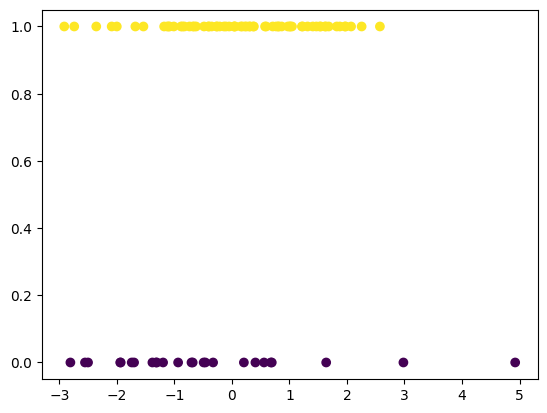

In [214]:
plt.scatter(X_test[:,0],y_test,c=y_test)

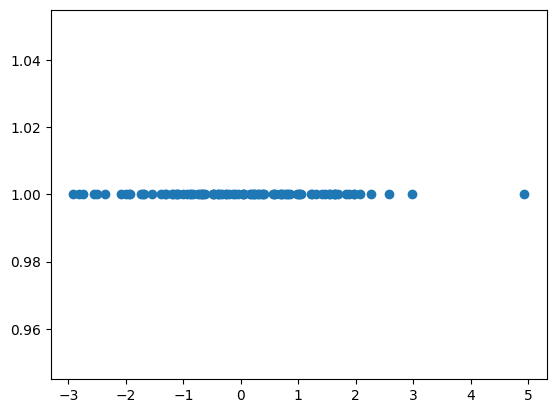

In [215]:
plt.scatter(X_test[:,0],y_pred)


In [216]:
#using KNN algo
from sklearn.neighbors import KNeighborsClassifier

In [217]:
knn=KNeighborsClassifier(n_neighbors=5)

In [218]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [219]:
y_pred=knn.predict(X_test)

In [220]:
accuracy_score(y_test,y_pred)


0.6344086021505376

In [221]:
confusion_matrix(y_test,y_pred)

array([[ 2, 23],
       [11, 57]])

In [222]:
#using support vector machine
from sklearn.svm import SVC

In [223]:
svcrbf=SVC(random_state=0)

In [224]:
svcrbf.fit(X_train,y_train)

SVC(random_state=0)

In [225]:
svclinear=SVC(kernel='linear',random_state=0)

In [226]:
svclinear.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [227]:
y_predr=svcrbf.predict(X_test)

In [228]:
y_predl=svclinear.predict(X_test)

In [229]:
accuracy_score(y_test,y_predr)

0.7311827956989247

In [230]:
accuracy_score(y_test,y_predl)

0.7311827956989247

In [231]:
#using XGBoost
from xgboost import XGBClassifier

In [232]:
xgb=XGBClassifier(n_estimators=300,max_depth=4,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',eval_metric='logloss',n_jobs=-1,random_state=42 )

In [233]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, ...)

In [234]:
y_pred=xgb.predict(X_test)

In [235]:
accuracy_score(y_test,y_pred)

0.6451612903225806

In [237]:
#Random forest and XGBoost are performing good with this dataset as compared to svc and knn algo